In [1]:
import numpy as np
import pandas as pd
import random
import tqdm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns 
import yaml
from pathlib import Path
import sys 
import os 
import networkx as nx 

sys.path.append(os.path.dirname(os.getcwd()))
from util.functions import logistic
from structure_generation.path_connection_gen import ProceduralGraphGenerator, StatsUtils, GraphStructureGenerator

100%|██████████| 10/10 [00:36<00:00,  3.70s/it]


Max X val:  0.9991095674658926 
 Min X val:  0.00034102781197531407 
 Max y val : 0.9994504205117097 
 Min y val : 0.0012924114706581724 



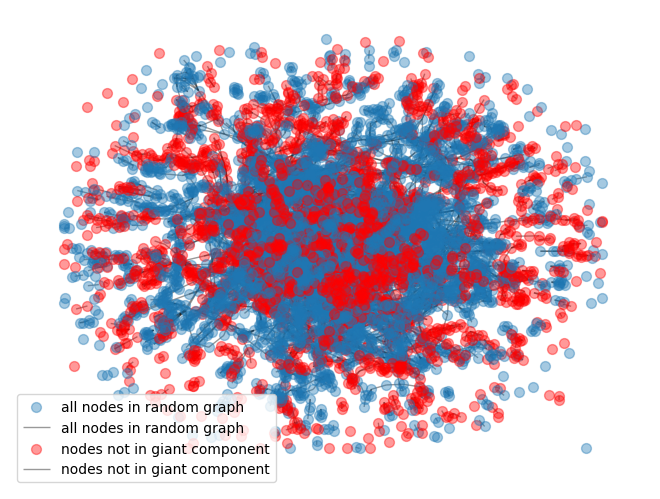

In [5]:
x = 10
for i in tqdm.tqdm(range(x)):
    graphgen = GraphStructureGenerator(
    structure_name="random_geometric", 
    num_nodes=500, 
    target_mean_degree = 4
    )
    graph = graphgen.initial_graph  

    giant_graph = graph.subgraph(max(nx.connected_components(graph), key=len))
    #graph.remove_nodes_from(list(giant_graph.nodes()))
    if i == x-1: 
        nx.draw(graph, alpha=0.4, node_size = 50, label = "all nodes in random graph")
        graph.remove_nodes_from(list(giant_graph.nodes()))
        nx.draw(graph, alpha=0.4, node_size = 50, node_color='r', label = "nodes not in giant component")
    else: 
        nx.draw(graph, alpha=0.4, node_size = 50)
        graph.remove_nodes_from(list(giant_graph.nodes()))
        nx.draw(graph, alpha=0.4, node_size = 50, node_color='r')

max_x, max_y, min_x, min_y = 0.5,0.5,0.5,0.5
for node in graph.nodes(data = True):
    x,y = node[1]['pos']
    if max_x < x: 
        max_x = x 
    elif min_x > x: 
        min_x = x 

    if max_y < y: 
        max_y = y
    elif min_y > y:
        min_y = y 

print(
    "Max X val: ", max_x, "\n",
    "Min X val: ", min_x, "\n",
    "Max y val :", max_y, "\n", 
    "Min y val :", min_y, "\n" 
)
plt.legend()
plt.show()